# ECON526: Quantitative Economics with Data Science Applications

Directed Graphical Models and Causality

Phil Solimine (University of British Columbia)

# Overview

## Summary

-   Previously in the course, we talked at a high level about some of
    the barriers to causal inference

-   We used the potential outcomes framework to discuss the idea of a
    treatment effect

-   Then we discussed the idea of a randomized experiment as a way to
    identify a treatment effect

    -   However, we mentioned that there are many situations where we
        cannot run a randomized experiment

-   Today, we will discuss the idea of using a **graphical model** as a
    way to analyze whether you can truly identify a treatment effect

# Directed Graphical Models

## Conditional Independence

-   Recall that two random variables $X$ and $Y$ are **conditionally
    independent** given a third random variable $Z$ if and only if the
    following holds:
    -   $P(X|Z) = P(X|Z\cap Y)$
    -   Equivalently, $P(X\cap Y| Z) = P(X|Z)P(Y|Z)$
    -   We will denote this as $X \perp Y | Z$
-   In the context of potential outcomes, we require that
    $(Y_0, Y_1) \perp T | X$
    -   This means that the potential outcomes are independent of the
        treatment assignment, given the covariates

## Directed Graphical Models

-   Complete independence is rare in complex systems. However, we can
    often find conditional independence relationships, that help inform
    our choice of statistical model.

-   We can visualize conditional independence relationships using a
    **Bayesian** or **directed graphical model**

-   A Bayesian graphical model is a directed graph where:

    -   The nodes or vertices represent random variables
    -   The links or edges represent conditional independence
        relationships

## Directed Graphical Models

-   Fundamentally, a graphical model is a way to represent how a joint
    probability distribution factorizes into a product of conditional
    distributions.

-   For our purposes, we will usually interpret the edges as causal
    relationships.

-   Furthermore, the graphs we draw will be **acyclic**, meaning that
    there are no loops in the graph.

    -   In other words, there is no way to start at a node and follow
        the arrows to get back to the same node
    -   This is because we are interested in **causal** relationships,
        and a cycle would imply that there is a feedback loop where a
        variable causes itself

-   Since these graphs are both directed and acyclic, we call them
    **directed acyclic graphs** or **DAGs**

## Directed Graphical Models

-   A directed graphical model might look something like this:

In [2]:
import graphviz as gr

g = gr.Digraph()
g.node('X')
g.node('Y')
g.node('Z')
g.edge('X', 'Y')
g.edge('Z', 'Y')
g

-   Here, we have three random variables: $X$, $Y$, and $Z$
    -   $X$ and $Z$ are independent
    -   $Y$ depends on both $X$ and $Z$

## Directed Graphical Models

In [3]:
g = gr.Digraph()
g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")
g

-   We use arrows to indicate the direction of the conditional
    independence relationship
    -   For example, $medicine \rightarrow survived$ means that
        $survived$ depends on $medicine$, but not the other way around

## Directed Graphical Models

-   Directed graphical models are useful because they allow us to
    visualize conditional independence relationships, which can often be
    difficult to keep track of

-   However, they are also useful because they allow us to determine
    whether or not we can identify a treatment effect.

-   There are three very common sub-structures that appear in graphical
    models, that inform how dependence will flow through the model.

## Directed Graphical Models

In [4]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", style="filled")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

-   In this stylized example of a **directed path**, we are postulating
    that knowing causal inference is the only way to solve business
    problems
    -   This is obviously not true, but it is a useful example for our
        purposes

## Directed Graphical Models

-   This model highlights the following statistical process:
    -   Knowing causal inference gives you the ability to solve business
        problems
    -   Solving business problems makes you more likely to get a job
        promotion
-   Notice that this does not imply that causal knowledge is independent
    of job promotion
    -   That is, if we know the value of job promotion, we can still
        learn something about causal knowledge
    -   If we observe that a promotion happens in this model, this tells
        us that it is more likely that the person knows causal inference

## Directed Graphical Models

-   Now let’s condition on the intermediate variable $Y$

    -   This is the variable that represents the ability to solve
        business problems
    -   In the graph, we have colored this variable grey to indicate
        that we are conditioning on it

-   Conditioning on $Y$ means that we are assuming that we know whether
    or not the person solved a business problem

-   In this case, conditioning on $Y$ breaks the dependence relationship
    between $X$ and $Z$

    -   That is, $X$ and $Z$ are now independent, given $Y$
    -   Mathematically, $A \perp C$, but $X \not\perp Z | Y$

## Directed Graphical Models

Now let’s look at another common structure:

In [5]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", style="filled")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

-   In this model, we are postulating that statistics is a prerequisite
    for both causal inference and machine learning.

## Directed Graphical Models

In [6]:
g

-   This model highlights the following statistical process:
    -   Knowing statistics gives you the ability to do causal inference
    -   Knowing statistics gives you the ability to do machine learning
-   When we don’t condition for the root node, $C$, there is still a
    dependence relationship between $A$ and $B$
    -   That is, if we know that an individual has causal knowledge,
        this tells us that they are more likely to know statistics, and
        thus to also know machine learning

## Directed Graphical Models

In [7]:
g

-   By conditioning on $X$, we break the dependence relationship between
    $Y$ and $Z$
    -   That is, $A\not\perp B$, but $Y \perp Z | X$
-   We would call this a **fork** structure

## Directed Graphical Models

Finally, let’s look at a third common structure, called a **collider**:

In [8]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", style="filled")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

-   In this model, we are postulating that statistics and flattery are
    both determinants of getting a job promotion.

# Building a Causal Graph

## Building a Causal Graph

-   Now that we have seen some examples of causal graphs, we should
    think about how to draw a causal graph for a problem in practice.

-   Drawing a causal graph is a way of encoding the assumptions that you
    are making about the data generating process.

-   The first step is to identify the variables that are relevant to the
    problem at hand.

    -   Do your research!

## Building a Causal Graph

-   In reality, there are many variables that are relevant to a problem.

-   Real data-generating processes are therefore extremely large and
    complex.

-   Think about what the data generating process might look like for
    something similar the online class example we have been using

    -   (if we didn’t have a randomized experiment)

## Building a Causal Graph

-   Let’s say we were interested in the effect of online classes on
    college dropout rates. The treatment effect we want to identify is:

In [9]:
g = gr.Digraph()
g.edge("OnlineClass", "Dropout", style="dashed")
g

## Building a Causal Graph

-   In addition to `OnlineClass`, there are **many** variables that
    might cause a student to drop out of college.

In [10]:
g.edge("AvailableTime", "Dropout")
g.edge("Age", "Dropout")
g.edge("Gender", "Dropout")
g.edge("Race", "Dropout")
g.edge("Academics", "Dropout")

g

## Building a Causal Graph

-   Some of these variables might **also** determine whether or not a
    student takes an online class.

In [11]:
g.edge("AvailableTime", "OnlineClass")

g

## Building a Causal Graph

-   Then there are some other variables that affect just `OnlineClass`
    and not `Dropout`

In [12]:
g.edge("InternetAccess", "OnlineClass")
g.edge("Preferences", "OnlineClass")

g

## Building a Causal Graph

-   There are relationships between some of these variables as well

In [13]:
g.edge("Age", "AvailableTime")
g.edge("Age", "Preferences")
g.edge("Gender", "Preferences")
g.edge("Race", "Preferences")

g

## Building a Causal Graph

-   Even if there is not a direct causal relationship between two
    variables, there might be an indirect relationship through a third
    variable

In [14]:
g.edge("Location", "InternetAccess")
g.edge("Age","SES")
g.edge("Age", "WorkHours")
g.edge("SES", "Preferences")
g.edge("WorkHours", "AvailableTime")
g.edge("Academics", "WorkHours")
g.edge("Race", "WorkHours")
g.edge("Gender", "WorkHours")
g.edge("Race", "AvailableTime")
g.edge("Gender", "AvailableTime")

g

## Building a Causal Graph

-   And then there are some variables that we know are correlated, but
    due to some other combination of unknown factors

In [15]:
g.node("U1", "U1", style="dashed")
g.edge("U1", "Race")
g.edge("U1", "Academics")

g.node("U2", "U2", style="dashed")
g.edge("U2", "Race")
g.edge("U2", "SES")

g.node("U3", "U3", style="dashed")
g.edge("U3", "Gender")
g.edge("U3", "Academics")

g.node("U4", "U4", style="dashed")
g.edge("U4", "Gender")
g.edge("U4", "SES")

g.node("U5", "U5", style="dashed")
g.edge("U5", "Location")
g.edge("U5", "SES")

g

## Building a Causal Graph

``` python
g
```



-   As we can see, this graph got very complex, very quickly.
-   It is clearly not capturing all of the relevant variables
-   What else might be missing?

## Building a Causal Graph

``` python
g
```



-   As we can see, this graph got very complex, very quickly.
-   It is clearly not capturing all of the relevant variables
-   What else might be missing?
    -   CommunityCollege vs. University
    -   *Income*

## Simplifying the Graph

-   In practice, we will not be able to draw a graph that captures
    everything. How can we choose which relationships to include, and
    which to ignore?

1.  **Unimportance** - If the arrows coming in and out of a variable all
    represent small or negligible effects, we can ignore them.

2.  **Redundancy** - If there are variables on the diagram that occupy
    the same space (i.e. they both have incoming and outgoing links from
    the same variables) then we can probably combine them into a single
    variable.

3.  **Mediators** - If a variable is **only** included as a way to
    connect two other variables, we can probably remove it.

4.  **Irrelevance** - If a variable is important to the DGP, but isn’t
    part of a **dependence path** between the treatment and the outcome,
    we can ignore it.

## Building a Causal Graph

``` python
g
```



-   **Unimportance** was already necessarily applied in the creation of
    the graph.
-   We can also apply **redundancy** by combining `Age` and `Gender`
    into a single variable, `Demographics`

## Building a Causal Graph

``` python
g
```



-   There are also quite a few **Mediators**
    -   The most prevelant is `Preferences`, (we can just have
        `Demographics`, etc. directly affect `OnlineClass`).
    -   We can throw out `InternetAccess` without losing anything.
-   There is one more. Can you find it?

## Building a Causal Graph

``` python
g
```



-   Notice that all of the variables that cause `AvailableTime` are also
    causes of `WorkHours`.

-   We can therefore throw out `AvailableTime`, and just have
    `WorkHours` directly affect `OnlineClass`, rather than through
    `AvailableTime`.

-   `AvailableTime` is also a mediator.

## Building a Causal Graph

-   We are left with a much simpler (although still messy) model, that
    still captures most of the relevant relationships.

-   Even though the simplified model is nicer to work with, these rules
    are just heuristics and shouldn’t be applied blindly.

In [21]:
g = gr.Digraph()
g.edge("OnlineClass", "Dropout", style="dashed")
g.edge("Age", "OnlineClass")
g.edge("Age", "Dropout")
g.edge("Age", "WorkHours")
g.edge("Age", "SES")
g.edge("Location", "OnlineClass")
g.edge("WorkHours", "OnlineClass")
g.edge("SES", "OnlineClass")
g.edge("Academics", "WorkHours")
g.edge("Academics", "Dropout")
g.edge("Demographics", "Dropout")
g.edge("Demographics", "OnlineClass")
g.edge("Demographics", "WorkHours")

g.node("U1", "U1", style="dashed")
g.edge("U1", "Academics")
g.edge("U1", "Demographics")

g.node("U4", "U4", style="dashed")
g.edge("U4", "SES")
g.edge("U4", "Demographics")

g.node("U5", "U5", style="dashed")
g.edge("U5", "SES")
g.edge("U5", "Location")

g

# Aside: Cycles

## Cycles

-   There is one thing that a causal diagram cannot have: a **cycle**.

-   A cycle is a directed path that starts and ends at the same node.

    -   This would mean that a variable causes itself, which is
        impossible.

-   The simplest cycles look like this:

In [22]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "A")

g.edge("X", "Y")
g.edge("Y", "Z")
g.edge("Z", "X")

g

## Cycles

-   Why can’t we have cycles? Surely there are feedback loops in the
    real world.

In [23]:
g = gr.Digraph()
g.edge("PrivateSchool", "Wealth")
g.edge("Wealth", "PrivateSchool")

g

-   If we have a cycle, then our causal problem is ill-specified.
    -   We can’t identify the effect of `PrivateSchool` on `Wealth`,
        because `Wealth` also causes `PrivateSchool`… or does it?

## Cycles

``` python
g = gr.Digraph()
g.edge("PrivateSchool(t)", "Wealth(t+1)")
g.edge("Wealth(t)", "PrivateSchool(t)")

g
```



-   We can solve this problem by introducing the **time** dimension.

-   By creating a new variable to represent the lagged value, we can
    break the cycle.

    -   This also loosely corresponds with the physicists view of
        causality, where the arrow of time is fundamental.
    -   Similar to the time-series concept of **Granger Causality**.

# Dependence Flows

## Dependence Flows

-   In order to determine whether or not we can identify a treatment
    effect, we need to understand how dependence **flows** through a
    graphical model.

-   We have seen that conditioning on a node can either make or break
    the dependence relationship between two other nodes

-   To identify the treatment effect, we want the *link between the
    treatment and the outcome to be unblocked*.

-   However, we also need to make sure that there is *no other
    dependence path* between the treatment and the outcome that is
    unblocked.

## The Rules of Bayes-Ball

-   We can think about the flow of dependence as a game of “Bayes-ball”
-   The rules of Bayes-ball are reasonably simple. A dependence path is
    blocked if and only if:
    1.  It contains a *non-collider* that is conditioned on
    2.  It contains a *collider* that is not conditioned on, and neither
        are *any of its descendants*

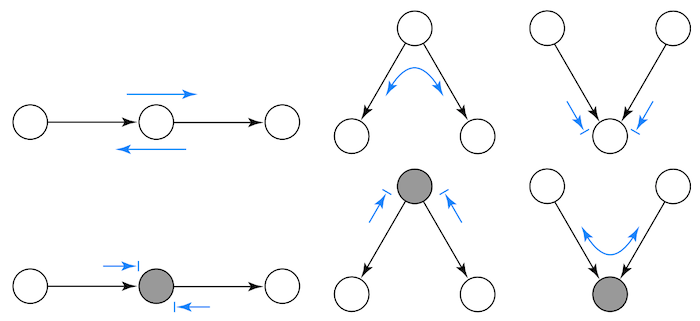

## Directed Graphical Models

Turning back to our **collider** example:

In [25]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", style="filled")

-   Notice that when we do not condition on $C$, $A$ and $B$ are
    independent.
-   However, somewhat unintuitively, when we condition on $X$, $Y$ and
    $Z$ become dependent.
    -   This is because conditioning on $X$ opens the flow of dependence
        from $Y$ to $Z$.
    -   In any case that is *not* a collider, conditioning on a node
        *blocks* the flow of dependence.

# Viualizing Bias

## Bias and Causality

-   In a causal inference framework, we can use graphical models to
    determine whether or not we can identify a treatment effect, and
    which covariates we need to condition on.

-   Typically, drawing out a graphical model is not necessary, but it
    can be a useful exercise to help you think through the problem.

    -   The links you draw represent the assumptions you are making
        about the data generating process

## Bias and Causality

-   There are two major types of bias that we need to worry about in
    causal inference:
    -   **Confounding**: When there is an unobserved variable that is a
        common cause of both the treatment and the outcome
    -   **Selection**: When there is an unobserved variable that is a
        common cause of both the treatment and the selection into the
        sample
-   Both of these types of bias can be represented using a graphical
    model

# Confounding

## Confounding

-   Let’s look at an example of confounding:

In [26]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("rain", "umbrella")
g.edge("rain", "wet")
g.edge("umbrella", "wet")

g.edge("severeness", "medicine")
g.edge("severeness", "survived")
g.edge("medicine", "survived")
g

-   To control for confounding, we need to condition on all of the
    common causes of the treatment and the outcome.

## Confounding

In [27]:
g = gr.Digraph()

g.node("Family Income")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")

g.node("SAT")
g.edge("SAT", "Educ")

g.node("Family Income")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

-   Often, there are confounding variables that we cannot observe
    -   For example, we cannot observe intelligence, but it is a common
        cause of both education (the treatment) and wages

## Confounding

In [28]:
g = gr.Digraph()

g.node("Family Income", style="filled")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")

g.node("SAT", style="filled")
g.edge("SAT", "Educ")

g.node("Family Income", style="filled")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

-   Often, there are confounding variables that we cannot observe
    -   For example, we cannot observe intelligence, but it is a common
        cause of both education (the treatment) and wages
    -   But we can use SAT as a **surrogate** or **proxy** for
        intelligence.

# Selection

## Selection

-   Selection bias often occurs when there is an unobserved variable
    that is a common cause of both the treatment and the selection into
    the sample

In [29]:
g = gr.Digraph()
g.node("X", style="filled")
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("Investments", "Investments", style="filled")
g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")
g.node("Educ2", "Educ")
g.node("Wage2", "Wage")
g.node("Investments2", "Investments", style="filled")
g.edge("Educ2", "Wage2")
g.edge("Wage2", "Investments2")
g.edge("Educ2", "Investments2")
g.edge("Investments2", "CapitalGains")
g

## Selection

-   Selection bias can also occur when controlling for a **mediator**
    between the treatment and the outcome

In [30]:
g = gr.Digraph()

g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", style="filled")

g.edge('Educ', 'WhiteCollar')
g.edge('Educ', 'Wage')
g.edge('WhiteCollar', 'Wage')
g.node('WhiteCollar', style="filled")

g

# Choosing Covariates

## Choosing Covariates

-   With these types of bias in mind, we can think about how to choose
    which covariates to condition on.

-   Notice that some controls will reduce bias, as in the case of
    confounding,

-   But *not all controls are good!* Some controls will actually create
    bias, as in the case of selection.

-   This means that we don’t want to just “throw the kitchen sink” at
    the problem, and include every variable we can think of.

## Choosing Covariates

-   We want to choose covariates that will close any unblocked secondary
    dependence paths between the treatment and the outcome, but not open
    any new ones.

-   To do this, we can use the “front door criterion” and the “back door
    criterion”

## The Front Door Criterion

-   The **front door criterion** is one way to isolate the effect of a
    treatment on an outcome, when there is a confounder and a mediator
    between the treatment and the outcome.

In [31]:
g = gr.Digraph()
g.edge("LotsOfStuff", "Smoking")
g.edge("LotsOfStuff", "LungCancer")
g.edge("Smoking", "Tar", style="dashed")
g.edge("Tar", "LungCancer", style="dashed")

g

## The Front Door Criterion

``` python
g = gr.Digraph()
g.edge("LotsOfStuff", "Smoking")
g.edge("LotsOfStuff", "LungCancer")
g.edge("Smoking", "Tar", style="dashed")
g.edge("Tar", "LungCancer", style="dashed")

g
```



-   In this example, we want to know the effect of smoking on lung
    cancer, but we also know that there are lots of variables (like
    stress), that cause both the treatment and the outcome.

-   However, stress does not cause tar, so we can condition on tar.

    -   This works by first measuring the effect of tar on lung cancer,
        and *then* the effect of smoking on tar.

## The Back Door Criterion

-   It’s pretty rare that we’ll actually be able to use the front door
    criterion, because we usually don’t have a mediator that we can
    condition on.

-   Instead, we can close all of the “back door paths” from treatment to
    outcome. We have already seen an example of this.

In [33]:
g = gr.Digraph()

g.node("Family Income", style="filled")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage", style="dashed")

g.node("SAT", style="filled")
g.edge("SAT", "Educ")

g.node("Family Income", style="filled")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

## Choosing Covariates: Two Examples

In [34]:
g = gr.Digraph()
g.edge("T", "Y", style="dashed")
g.edge("X", "Y")
g

-   Do we need to condition on $X$?

## Choosing Covariates: Two Examples

In [35]:
g = gr.Digraph()
g.edge("T", "Y", style="dashed")
g.edge("X", "Y")
g

-   Do we need to condition on $X$?
    -   No, not necessarily. There is no unblocked dependence path
        between $T$ and $Y$ that goes through $X$.
    -   However, conditioning on $X$ will reduce the variance of our
        estimate!
    -   If we didn’t condition on $X$, it would become part of our
        estimation error. But since $X \propto T$, it won’t bias our
        estimate.

## Choosing Covariates: Two Examples

In [36]:
g = gr.Digraph()
g.edge("R", "T")
g.edge("C", "T")
g.edge("C", "Y")
g.edge("T", "Y", style="dashed")
g

-   Suppose we don’t have any data on $C$. Can we identify the treatment
    effect?
    -   Yes! If we look at the effect of $R$ on $Y$, we can see that it
        is unblocked.
    -   Furthermore, since $R$ only affects $Y$ through $T$, the effect
        of $R$ on $Y$ is the same as the effect of $T$ on $Y$.
    -   This is called an **instrumental variable**.

## Credits

This lecture draws heavily from [Causal Inference for the Brave and
True: Chapter 04 - Graphical Causal
Models](https://matheusfacure.github.io/python-causality-handbook/03-Stats-Review-The-Most-Dangerous-Equation.html.html)
by Matheus Facure.

There is also material from [A Short Course on Graphical Models Chapter
2: Structured
Representations](http://ai.stanford.edu/~paskin/gm-short-course/) by
Mark Paskin.

As well as [The Effect: Chapter 7 - Drawing Graphical
Diagrams](https://theeffectbook.net/) by Nick Huntington-Klein.